# I : Sentiment Analysis

## 1. Introduction

### 1.1 About

#### Importing Libraries

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2 preprocessing
import re
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag


# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')  


# 4
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils.class_weight import compute_class_weight

import numpy as np
import matplotlib.pyplot as plt

#5.1
from sklearn.linear_model import LogisticRegression

#5.2
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.ticker import ScalarFormatter

# 5.3
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# 5.4
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping


[nltk_data] Downloading package punkt to /Users/beatev/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/beatev/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/beatev/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/beatev/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


#### Loading Dataset

In [7]:
reviews = pd.read_csv("Hotel_Reviews.csv", sep=';')

## 2. Exploratory Data Analysis

In [9]:
reviews.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam N...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available ...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam N...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam N...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam N...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam N...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line yo...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


Display the first few rows to get an overview

In [10]:
reviews.sample(3)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
217165,59 Leinster Square Kensington and Chelsea Lond...,337,5/19/2017,7.6,New Linden Hotel,Denmark,To room to small for 2 people and the breakfas...,48,2820,Very nice area and clean hotel close to Hyde ...,12,12,5.8,"[' Leisure trip ', ' Couple ', ' Standard Doub...",76 days,51.513383,-0.192662
261980,92 Southampton Row Camden London WC1B 4BH Unit...,429,9/7/2015,8.3,DoubleTree by Hilton London West End,United Kingdom,No Negative,0,1774,Great service,3,8,10.0,"[' Business trip ', ' Solo traveler ', ' Doubl...",696 day,51.520106,-0.122139
109325,22 Hertsmere Road Tower Hamlets London E14 4ED...,930,8/14/2016,8.9,London Marriott Hotel West India Quay,United Kingdom,No Negative,0,2836,Everything Room was amazing,6,1,10.0,"[' Leisure trip ', ' Couple ', ' Deluxe King o...",354 day,51.507271,-0.021121


The data shows hotel reviews for different hotels all over the world

In [106]:
rows, cols = reviews.shape
print(f"The dataset has {cols} columns and {rows} rows in total.")


The dataset has 4 columns and 515085 rows in total.


#### Check for duplicate rows

In [12]:
duplicates = reviews.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 526


#### Remove duplicate rows 

In [13]:
reviews = reviews.drop_duplicates()
print("Dataset shape after removing duplicates:", reviews.shape)

Dataset shape after removing duplicates: (515212, 17)


#### Dataset Details

In [14]:
reviews.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')

##### Description of columns in the file:
1. Hotel_Address – The full address of the hotel.

2. Additional_Number_of_Scoring – Number of additional reviews that contributed to the hotel's score.

3. Review_Date – The date the review was written.

4. Average_Score – The average score of the hotel at the time of the review.

5. Hotel_Name – Name of the hotel being reviewed.

6. Reviewer_Nationality – The nationality of the reviewer.

7. Negative_Review – The negative comments left by the reviewer. If none, "No Negative" is recorded.

8. Review_Total_Negative_Word_Counts – Total word count in the negative review.

9. Total_Number_of_Reviews – The total number of reviews the hotel has received.

10. Positive_Review – The positive comments left by the reviewer.

11. Review_Total_Positive_Word_Counts – Total word count in the positive review.

12. Total_Number_of_Reviews_Reviewer_Has_Given – Number of reviews the reviewer has submitted in total.

13. Reviewer_Score – The numeric score the reviewer gave the hotel.

14. Tags – Extra metadata such as type of trip, traveler category, room type, etc., stored as a list of tags.

15. days_since_review – How many days ago the review was submitted, relative to a reference date.

16. lat – Latitude of the hotel.

17. lng – Longitude of the hotel.

This dataset contains hotel reviews collected from various users across multiple countries. Each row represents a single review of a hotel and includes metadata about the reviewer, the review content, and the hotel itself.


#### Checking the data set for missing values

In [15]:
print("Missing values per column:\n", reviews.isnull().sum())

Missing values per column:
 Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64


Check for missing values in each column. This helps identify irrelevant or problematic columns.
Columns with high amounts of missing data (e.g. 'lat' and 'lng') will be dropped later in the project if they are not needed for modeling.

#### Display summary statistics for the numerical columns in the dataset.

This provides information about distributions, central tendency and spread of values, which helps identify potential outliers, skewness, or anomalies in the data.

In [16]:
print("\nSummary statistics:")
print(reviews.describe())


Summary statistics:
       Additional_Number_of_Scoring  Average_Score  \
count                 515212.000000  515212.000000   
mean                     498.416021       8.397767   
std                      500.668595       0.547952   
min                        1.000000       5.200000   
25%                      169.000000       8.100000   
50%                      342.000000       8.400000   
75%                      660.000000       8.800000   
max                     2682.000000       9.800000   

       Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
count                      515212.000000            515212.000000   
mean                           18.540822              2744.698889   
std                            29.693991              2318.090821   
min                             0.000000                43.000000   
25%                             2.000000              1161.000000   
50%                             9.000000              2134.000000   
75%      

The describe() method provides a statistical summary of the numeric columns. From this, we can observe the following:

- "Average_Score" reflects the overall score for the hotel across all reviewers, while "Reviewer_Score" is the individual score given by the reviewer for this particular review. Since we're doing sentiment analysis on individual reviews, 'Reviewer_Score' is our target variable. The mean 'Reviewer_Score' is 8.4, which indicates that most reviewers were generally satisfied.

- The average word count is slightly higher for negative reviews (~18.54) compared to positive reviews (~17.78).

- Total_Number_of_Reviews and Total_Number_of_Reviews_Reviewer_Has_Given show the activity level of both hotels and reviewers.

#### Checking for reviews with 0 word count / meaningless reviews like "No Positive" or "No Negative"

In [17]:
zero_pos = reviews[reviews['Review_Total_Positive_Word_Counts'] == 0]
zero_neg = reviews[reviews['Review_Total_Negative_Word_Counts'] == 0]
print(f"\nNumber of positive reviews with 0 words: {len(zero_pos)}")
print(f"Number of negative reviews with 0 words: {len(zero_neg)}")

only_no_pos = reviews[reviews['Positive_Review'].str.strip().str.lower() == 'no positive']
only_no_neg = reviews[reviews['Negative_Review'].str.strip().str.lower() == 'no negative']
print(f"\nReviews that only say 'No Positive': {len(only_no_pos)}")
print(f"Reviews that only say 'No Negative': {len(only_no_neg)}")


Number of positive reviews with 0 words: 35904
Number of negative reviews with 0 words: 127757

Reviews that only say 'No Positive': 35904
Reviews that only say 'No Negative': 127757


This is expected, because the values like "No Positive" or "No Negative" appear when customers did not write any real text. These reviews are often not meaningful for sentiment analysis.

#### Removing reviews where both the positive and negative columns are empty

In [18]:
reviews = reviews[
    ~((reviews['Positive_Review'].str.strip().str.lower() == 'no positive') &
      (reviews['Negative_Review'].str.strip().str.lower() == 'no negative'))
]

print(f"\nRemaining rows after removing empty reviews: {len(reviews)}")


Remaining rows after removing empty reviews: 515085


Reviews with no meaningful content in both the positive and negative columns are removed, as they do not contribute useful information for sentiment analysis.

#### Set 'No Positive' and 'No Negative' placeholders to empty string (if no real text is present).

In [19]:
reviews.loc[reviews['Review_Total_Positive_Word_Counts'] == 0, 'Positive_Review'] = ''
reviews.loc[reviews['Review_Total_Negative_Word_Counts'] == 0, 'Negative_Review'] = ''

#### Confirm none remain with 0 word count and still have text

In [20]:
check_pos = reviews[(reviews['Review_Total_Positive_Word_Counts'] == 0) & (reviews['Positive_Review'].str.strip() != '')]
check_neg = reviews[(reviews['Review_Total_Negative_Word_Counts'] == 0) & (reviews['Negative_Review'].str.strip() != '')]

print(f"Positive reviews with 0 word count but still have non-empty text: {len(check_pos)}")
print(f"Negative reviews with 0 word count but still have non-empty text: {len(check_neg)}")

Positive reviews with 0 word count but still have non-empty text: 0
Negative reviews with 0 word count but still have non-empty text: 0


If a review only contains the placeholder "No Positive" or "No Negative" and has 0 word count, we mark that part of the review as empty string " ".
These are not meaningful and should not be treated as real input in the modeling.

It removes noise without losing rows that contain valuable text in one of the columns.

#### Drop columns that are irrelevant for sentiment classification to simplify the dataset

In [21]:
reviews = reviews.drop([
    'Hotel_Address',
    'Additional_Number_of_Scoring',
    'Review_Date',
    'Average_Score',
    'Hotel_Name',
    'Tags',
    'days_since_review',
    'lat',
    'lng',
    'Total_Number_of_Reviews',
    'Total_Number_of_Reviews_Reviewer_Has_Given',
    'Reviewer_Nationality'
], axis=1)

reviews.head()

,Negative_Review,Review_Total_Negative_Word_Counts,Positive_Review,Review_Total_Positive_Word_Counts,Reviewer_Score
0,I am so angry that i made this post available ...,397,Only the park outside of the hotel was beauti...,11,2.9
1,,0,No real complaints the hotel was great great ...,105,7.5
2,Rooms are nice but for elderly a bit difficul...,42,Location was good and staff were ok It is cut...,21,7.1
3,My room was dirty and I was afraid to walk ba...,210,Great location in nice surroundings the bar a...,26,3.8
4,You When I booked with your company on line yo...,140,Amazing location and building Romantic setting,8,6.7


#### Columns kept:
- `Positive_Review` and `Negative_Review`: Will be merged into `Full_Review`.
- `Reviewer_Score`: Used for binary sentiment label.
- Word count columns: Kept for transparency and possible debugging.


#### Combine positive and negative reviews

In [22]:
reviews['Full_Review'] = (
    reviews['Positive_Review'].fillna('').str.strip() + " " +
    reviews['Negative_Review'].fillna('').str.strip()
).str.strip()

Merge `Positive_Review` and `Negative_Review` into `Full_Review` to give the model full context. Drop the original review columns and word count columns after merging.

In [23]:
reviews = reviews.drop(["Positive_Review", "Negative_Review", "Review_Total_Positive_Word_Counts", "Review_Total_Negative_Word_Counts"], axis=1)

reviews.head()

,Reviewer_Score,Full_Review
0,2.9,Only the park outside of the hotel was beautif...
1,7.5,No real complaints the hotel was great great l...
2,7.1,Location was good and staff were ok It is cute...
3,3.8,Great location in nice surroundings the bar an...
4,6.7,Amazing location and building Romantic setting...


#### Rename combined review column

In [24]:
reviews.rename(columns={'Full_Review': 'Review'}, inplace=True)

#### Check for missing values to ensure the dataset is clean and ready for modeling

In [25]:
print(reviews.isnull().sum())

Reviewer_Score    0
Review            0
dtype: int64


All unnecessary columns have been removed, and the positive and negative reviews have been combined into a single Review column.
The dataset has no missing values.

In [26]:
review_lengths = reviews['Review'].apply(lambda x: len(x.split()))

# Vis statistikk
print("Review length stats (after merge):")
print(review_lengths.describe())

# 95. percentil
p95 = int(review_lengths.quantile(0.95))
print(f"95% of reviews are shorter than {p95} words.")


Review length stats (after merge):
count    515085.000000
mean         33.690432
std          38.438200
min           0.000000
25%          11.000000
50%          22.000000
75%          43.000000
max         733.000000
Name: Review, dtype: float64
95% of reviews are shorter than 102 words.


#### Final dataset ready for modeling

All unnecessary columns are removed. Reviews are combined into one `Review` column, and `Reviewer_Score` is kept for sentiment labeling. No missing values remain.


## 2. Preprocessing

In [27]:
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("averaged_perceptron_tagger")
nltk.download("omw-1.4")
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt to /Users/beatev/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/beatev/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/beatev/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/beatev/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /Users/beatev/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/beatev/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

#### Initialize tools

In [28]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

Initialize lemmatizer and stopwords to normalize text and reduce noise for better model focus.

#### POS Tag Mapping for Lemmatization

In [29]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

#### Check for special content (numeric patterns)

In [30]:
has_numbers = reviews['Review'].str.contains(r"\b\d+\b").sum()
print(f"Reviews with standalone numbers: {has_numbers}")

Reviews with standalone numbers: 86923


In [31]:
has_single_letters = reviews['Review'].str.contains(r"\b[a-zA-Z]\b", regex=True).sum()
print(f"Reviews with standalone letters: {has_single_letters}")

Reviews with standalone letters: 263029


In [ ]:
from collections import Counter
import re

single_letters = []

for review in reviews["Review"]:
    if isinstance(review, str):
        words = re.findall(r"\b[a-zA-Z]\b", review)
        single_letters.extend(words)

letter_counts = Counter(single_letters)

for letter, count in letter_counts.most_common():
    print(f"Letter '{letter}': {count} times")

Letter 'a': 375805 times
Letter 'I': 168891 times
Letter 't': 89358 times
Letter 's': 34685 times
Letter 'A': 19051 times
Letter 'i': 14453 times
Letter 'd': 4795 times
Letter 'm': 4287 times
Letter 'e': 2130 times
Letter 'N': 1746 times
Letter 'n': 1526 times
Letter 'u': 1376 times
Letter 'v': 1266 times
Letter 'C': 1163 times
Letter 'g': 962 times
Letter 'c': 749 times
Letter 'o': 641 times
Letter 'U': 624 times
Letter 'l': 616 times
Letter 'V': 591 times
Letter 'x': 564 times
Letter 'B': 550 times
Letter 'D': 532 times
Letter 'b': 404 times
Letter 'p': 370 times
Letter 'M': 343 times
Letter 'T': 336 times
Letter 'r': 323 times
Letter 'S': 306 times
Letter 'w': 298 times
Letter 'L': 281 times
Letter 'W': 207 times
Letter 'X': 193 times
Letter 'K': 181 times
Letter 'h': 180 times
Letter 'G': 174 times
Letter 'E': 167 times
Letter 'y': 160 times
Letter 'P': 157 times
Letter 'f': 151 times
Letter 'F': 118 times
Letter 'O': 111 times
Letter 'k': 105 times
Letter 'R': 95 times
Letter 'H':

#### Preprocessing function for cleaning and normalizing the review text

We apply the following preprocessing steps to clean the review texts before feeding them to machine learning models. These steps are chosen to reduce noise and standardize the input for better model performance.

In [ ]:
def preprocess_text(text):
    # Lowercase for consistency
    text = text.lower()

    # Remove standalone numbers
    text = re.sub(r"\b\d+\b", "", text)

    # Remove all special characters (keep only letters and spaces)
    text = re.sub(r"[^a-z\s]", "", text)
    
    # Remove extra spaces
    text = re.sub(r"\s+", " ", text).strip()

    # Fjern enkeltbokstaven "u"
    text = re.sub(r"\bu\b", "", text)

    # Tokenize
    tokens = word_tokenize(text, preserve_line=True)

    # Remove standalone letters after tokenize
    tokens = [word for word in tokens if len(word) > 1]

    # POS tag
    pos_tags = pos_tag(tokens, lang="eng")

    # Lemmatize with correct POS
    lemmatized = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) 
                  for word, tag in pos_tags]

    # Remove stopwords after lemmatizing
    cleaned = [word for word in lemmatized if word not in stop_words]

    # Remove standalone letters again (after stopword removal, for safety)
    cleaned = [word for word in cleaned if len(word) > 1]

    return " ".join(cleaned)

##### Overview of text preprocessing:

- Lowercase text for consistency.
- Remove standalone numbers and special characters.
- Clean up extra whitespace.
- Remove the standalone letter "u".
- Tokenize and apply POS tagging.
- Lemmatize words using correct POS.
- Remove stopwords after lemmatization.
- Remove any remaining single characters.

This reduces noise and standardizes the text for vectorization and model training.

#### Apply preprocessing to the review texts

In [34]:
reviews["Cleaned_Review"] = reviews["Review"].apply(preprocess_text)

In [ ]:
# Final check to ensure all standalone letters are removed after preprocessing
has_single_letters = reviews['Cleaned_Review'].str.contains(r"\b[a-zA-Z]\b", regex=True).sum()
print(f"Reviews with standalone letters: {has_single_letters}")

Reviews with standalone letters: 0


#### Compare original and cleaned review text

In [36]:
reviews[["Review", "Cleaned_Review"]].head()

,Review,Cleaned_Review
0,Only the park outside of the hotel was beautif...,park outside hotel beautiful angry make post a...
1,No real complaints the hotel was great great l...,real complaint hotel great great location surr...
2,Location was good and staff were ok It is cute...,location good staff ok cute hotel breakfast ra...
3,Great location in nice surroundings the bar an...,great location nice surroundings bar restauran...
4,Amazing location and building Romantic setting...,amaze location building romantic setting book ...


This preview helps verify that preprocessing steps worked as intended.

We check that:

- All text is lowercased
- standalone numbers are removed
- Words are correctly lemmatized using POS tagging
- Stopwords are removed

This helps ensure that the text is cleaned consistently before training.


## 3. Sentiment Labeling and Vocabulary Setup

### Rating Distribution and Sentiment Threshold

##### Visualize the distribution of Reviewer_Score

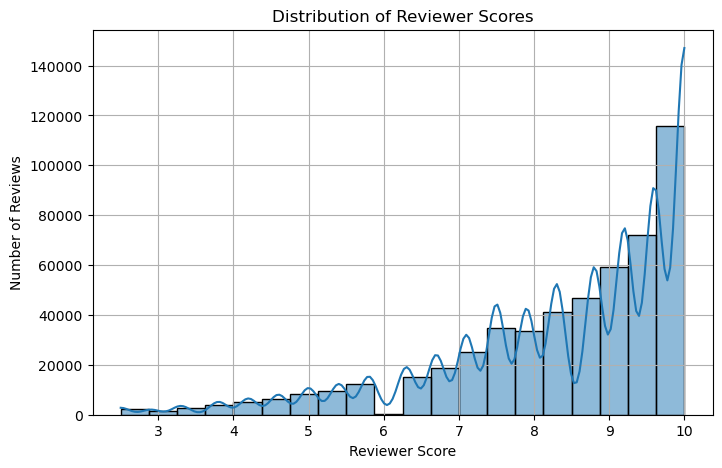

In [37]:
plt.figure(figsize=(8, 5))
sns.histplot(reviews['Reviewer_Score'], bins=20, kde=True)
plt.title('Distribution of Reviewer Scores')
plt.xlabel('Reviewer Score')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()

##### Show descriptive stats

In [38]:
print("Descriptive statistics for reviewer scores:")
print(reviews['Reviewer_Score'].describe())

Descriptive statistics for reviewer scores:
count    515085.000000
mean          8.395559
std           1.637463
min           2.500000
25%           7.500000
50%           8.800000
75%           9.600000
max          10.000000
Name: Reviewer_Score, dtype: float64


##### Check median and percentiles

In [39]:
median_score = reviews['Reviewer_Score'].median()
q1 = reviews['Reviewer_Score'].quantile(0.25)
q3 = reviews['Reviewer_Score'].quantile(0.75)

In [40]:
print(f"\nMedian score: {median_score}")
print(f"25th percentile (Q1): {q1}")
print(f"75th percentile (Q3): {q3}")


Median score: 8.8
25th percentile (Q1): 7.5
75th percentile (Q3): 9.6


##### Suggest threshold based on median

In [41]:
suggested_threshold = median_score
print(f"\nSuggested threshold for positive sentiment: scores >= {suggested_threshold:.1f}")


Suggested threshold for positive sentiment: scores >= 8.8


**We convert numerical reviewer scores into binary sentiment labels:**
- Reviews with a score of 8 or higher are considered **positive** (label = 1)
- Reviews with a score below 8 are considered **negative** (label = 0)

Although the median score is 8.8, we use 8.0 to achieve a more balanced label distribution.  
This threshold lies between the 25th percentile (7.5) and the median (8.8), and aligns with common interpretations of "positive" feedback.


In [42]:
reviews['Sentiment'] = reviews['Reviewer_Score'].apply(lambda x: 1 if x >= 8 else 0)

In [43]:
sentiment_counts = reviews['Sentiment'].value_counts()

print("Sentiment label distribution:")
print(sentiment_counts)

Sentiment label distribution:
Sentiment
1    335279
0    179806
Name: count, dtype: int64


Positive (1): 335 279

Negative (0): 179 806

#### Visualizing the Distribution of Sentiment Labels (Positive vs. Negative)

In [44]:
sentiment_counts = reviews['Sentiment'].value_counts().sort_index()

sentiment_percent = sentiment_counts / sentiment_counts.sum() * 100

sentiment_summary = pd.DataFrame({
    'Count': sentiment_counts,
    'Percentage': sentiment_percent.round(2)
})

print("Distribution of Sentiment Labels:")
print(sentiment_summary)


Distribution of Sentiment Labels:
            Count  Percentage
Sentiment                    
0          179806       34.91
1          335279       65.09


The sentiment labels are moderately imbalanced, with approximately 65% positive and 35% negative reviews.

#### Visual Breakdown of Positive vs. Negative Sentiment After Label Thresholding

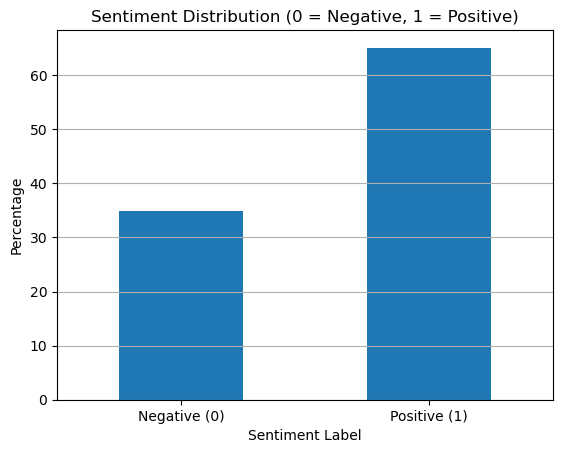

In [45]:
sentiment_summary['Percentage'].plot(kind='bar', title='Sentiment Distribution (0 = Negative, 1 = Positive)')
plt.ylabel('Percentage')
plt.xlabel('Sentiment Label')
plt.xticks(ticks=[0, 1], labels=['Negative (0)', 'Positive (1)'], rotation=0)
plt.grid(True, axis='y')
plt.show()

The chart shows a class imbalance, with approximately 35% negative and 65% positive reviews.
To account for this imbalance during training, we will later apply class weights. This will adjust the model's loss function to give more importance to the minority class (negative reviews), helping the model avoid bias toward the majority class.

### Vocabulary Analysis to Determine `max_words`

In [46]:
from collections import Counter

all_words = " ".join(reviews["Cleaned_Review"]).split()
word_freq = Counter(all_words)

print(f"Total unique words: {len(word_freq)}")

common_words = [word for word, freq in word_freq.items() if freq >= 10]
print(f"Words occurring 10+ times: {len(common_words)}")
print(f"Top 10 most common words: {word_freq.most_common(10)}")


Total unique words: 70264
Words occurring 10+ times: 11640
Top 10 most common words: [('room', 391600), ('staff', 236545), ('hotel', 210190), ('location', 204555), ('breakfast', 145490), ('good', 143871), ('great', 115808), ('bed', 102606), ('friendly', 90376), ('clean', 82815)]


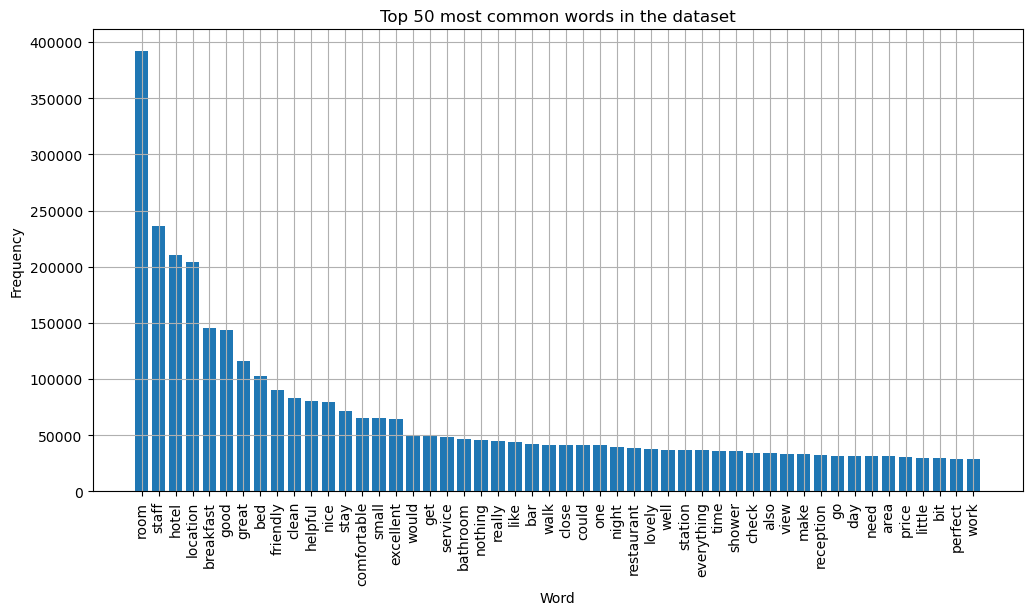

In [47]:
import matplotlib.pyplot as plt

common_words = word_freq.most_common(50)
words, freqs = zip(*common_words)

plt.figure(figsize=(12, 6))
plt.bar(words, freqs)
plt.xticks(rotation=90)
plt.title("Top 50 most common words in the dataset")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

#### Vocabulary analysis and choice of `max_words`

The dataset contains over 70,000 unique words, but only ~11,600 occur 10 or more times.  
To reduce noise and improve generalization, we limit the vocabulary to the top 10,000 most frequent words.

This cutoff keeps the model focused on meaningful and commonly used terms, while filtering out rare words that add little value and may cause overfitting.

We use `max_words = 10000` for both Tokenizer (used in the LSTM model) and TfidfVectorizer (used in classical models) to ensure consistency across models.


## 4. Preparing Data for Modeling

Before training machine learning models, we need to prepare the review text for input and split the dataset into training and testing subsets.

#### Separate features (X) and target labels (y)


In [48]:
X = reviews['Cleaned_Review']
y = reviews['Sentiment']

### Split data into training and test sets

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

print("Training samples:", len(X_train))
print("Test samples:", len(X_test))

Training samples: 412068
Test samples: 103017


We split the data 80/20 using stratified sampling to preserve label distribution.  
This ensures enough data for training while keeping a representative test set for evaluation.

### Text vectorization with TF-IDF

To prepare the text for machine learning, we use TF-IDF to convert reviews into numerical vectors.  
This captures how important each word is in a review relative to the whole dataset.

In [50]:
vectorizer = TfidfVectorizer(max_features=10000)

We set `max_features=10000` to focus on the most relevant words while avoiding overfitting and long training times.  
This value offers a good balance between model performance and complexity, and is commonly used in sentiment analysis.

#### Fit on training data and transform both train and test sets

In [51]:
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("TF-IDF vector shape (train):", X_train_tfidf.shape)
print("TF-IDF vector shape (test):", X_test_tfidf.shape)

TF-IDF vector shape (train): (412068, 10000)
TF-IDF vector shape (test): (103017, 10000)


We fit the TF-IDF vectorizer on the training data and apply the same transformation to the test set.  
This ensures consistent features across both sets.

The resulting matrices have 10,000 columns, one for each of the most important words in the training data.  
These will be used as input for machine learning models

### Visualizing Top 20 TF-IDF Features

To understand which words carry the most weight, we plot the 20 words with the highest average TF-IDF scores in the training set.

#### Compute average TF-IDF scores per feature (word)

In [52]:
mean_tfidf_scores = np.asarray(X_train_tfidf.mean(axis=0)).flatten()

#### Retrieve the feature names (vocabulary terms)

In [53]:
feature_names = vectorizer.get_feature_names_out()

#### Identify the indices of the top 20 highest-scoring words

In [54]:
top_indices = mean_tfidf_scores.argsort()[::-1][:20]

#### Extract the top 20 words and their corresponding TF-IDF scores

In [55]:
top_features = [feature_names[i] for i in top_indices]
top_scores = mean_tfidf_scores[top_indices]

#### Create a horizontal bar plot of the top 20 TF-IDF features

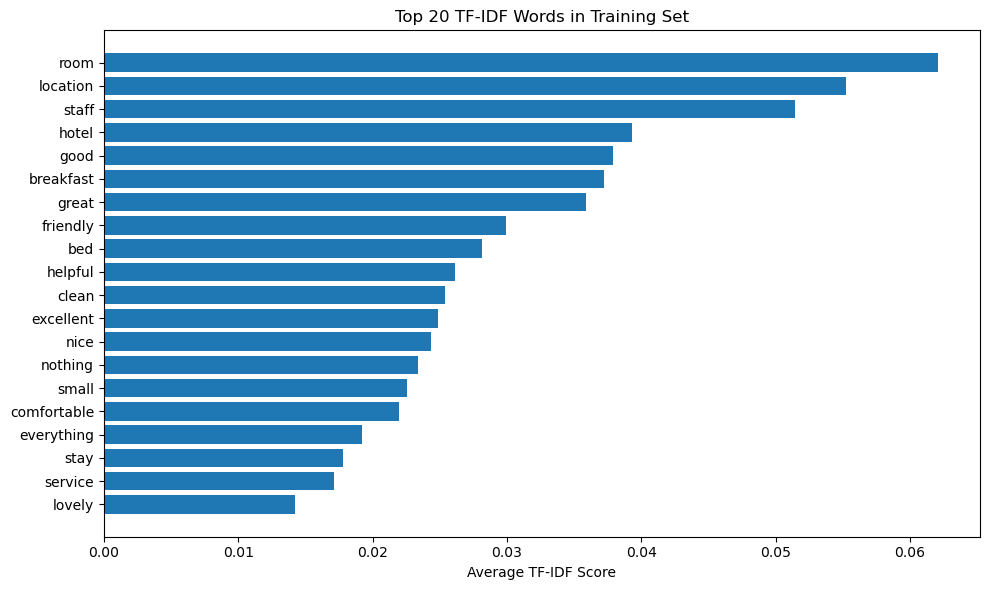

In [56]:
plt.figure(figsize=(10, 6))
plt.barh(top_features[::-1], top_scores[::-1])
plt.xlabel("Average TF-IDF Score")
plt.title("Top 20 TF-IDF Words in Training Set")
plt.tight_layout()
plt.show()

The plot shows the most frequent and informative words in the training set based on TF-IDF scores.  
While many top words like *room*, *location*, and *staff* are neutral, they often appear in context with sentiment-bearing terms (e.g. “clean room”, “rude staff”).  
This highlights how common topics in hotel reviews interact with sentiment — and will be useful for downstream modeling.


#### Visualizing Bottom 20 TF-IDF Features

We now inspect the 20 least informative words in the training set based on their average TF-IDF score. These words are rarely used or are evenly distributed across reviews, making them less useful for classification.

##### Compute average TF-IDF scores per feature (word)

In [57]:
avg_tfidf_scores = X_train_tfidf.mean(axis=0).A1
feature_names = vectorizer.get_feature_names_out()

##### Combine into dataframe for sorting and inspection

In [58]:
tfidf_df = pd.DataFrame({'word': feature_names, 'score': avg_tfidf_scores})

##### Sort by lowest TF-IDF scores

In [59]:
bottom_tfidf = tfidf_df.sort_values(by="score", ascending=True).head(20)

##### Create a horizontal bar plot of the bottom 20 TF-IDF features

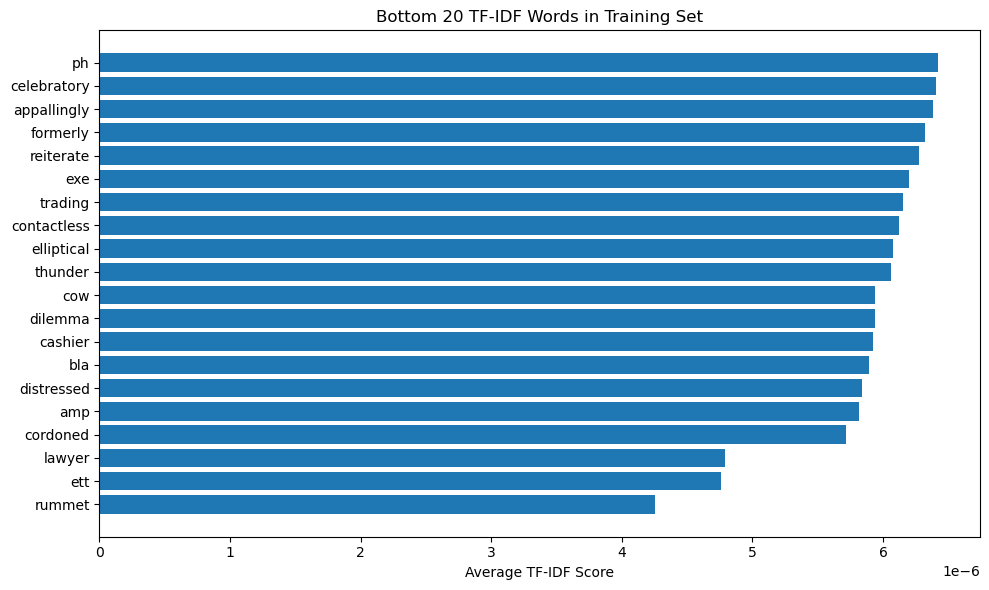

In [60]:
plt.figure(figsize=(10, 6))
plt.barh(bottom_tfidf['word'], bottom_tfidf['score'])
plt.xlabel("Average TF-IDF Score")
plt.title("Bottom 20 TF-IDF Words in Training Set")
plt.tight_layout()
plt.show()

These are the 20 words in the training set with the lowest average TF-IDF scores. Words with very low scores appear infrequently and/or are not strongly associated with any particular review, making them less useful for distinguishing sentiment.

Examples include uncommon words like "acknowledgement", "whoever", or brand-specific terms like "sainsbury". While they may carry meaning in individual reviews, they are generally not informative for modeling and are filtered out by the max_features setting in the vectorizer.

This analysis supports our earlier design choice to limit the vocabulary to the top 5000 most important terms. Removing low-impact words helps simplify the model and improve generalization by focusing on the strongest sentiment indicators.

## 5. Building Sentiment Classification Models

We now train and evaluate different models to classify reviews as positive or negative.  
This allows us to compare their performance and select the best approach for sentiment analysis.

### 5.1 Logistic Regression (Baseline)

Logistic Regression is a simple, fast, and interpretable model for binary classification. It provides a strong baseline for comparing more complex models later.

#### Initialize the model

In [61]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)

#### Fit on TF-IDF training data

In [62]:
log_reg.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000, random_state=42)

#### Predict on test set

In [63]:
y_pred_logreg = log_reg.predict(X_test_tfidf)

#### Logistic Regression Evaluation

#### Accuracy score

In [64]:
accuracy = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

Logistic Regression Accuracy: 0.7907


#### Classification report

In [65]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logreg))


Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.63      0.68     35961
           1       0.82      0.88      0.85     67056

    accuracy                           0.79    103017
   macro avg       0.77      0.75      0.76    103017
weighted avg       0.79      0.79      0.79    103017



The model achieves **79.1% accuracy**, which is strong for a simple baseline.

- **Negative class (0)**: Precision = 0.73, Recall = 0.63  
- **Positive class (1)**: Precision = 0.82, Recall = 0.88

The model performs better on positive reviews, likely due to class imbalance.  
This confirms the need to handle imbalance in future models (e.g., with class weights or resampling).


#### Confusion Matrix – Logistic Regression

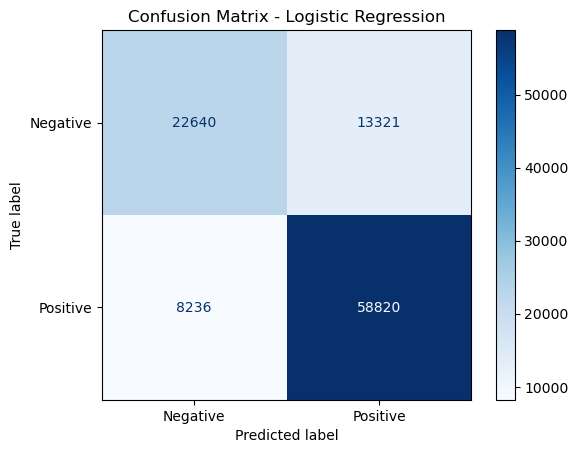

In [66]:
cm = confusion_matrix(y_test, y_pred_logreg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

The model correctly classifies most positive reviews (TP = 58,820), but struggles more with negative reviews (TN = 22,640).  
It produces a high number of false positives (13,321), where negative reviews are misclassified as positive.

This reflects the class imbalance in the dataset, where the model learns stronger patterns from the majority class (positive).

To address the performance gap between classes, we will later train an LSTM model with class weights.  
This allows the model to give more attention to the minority class and improve overall balance in predictions.


### 5.2 Multinomial Naive Bayes

Multinomial Naive Bayes is a simple probabilistic model often used in text classification.  
Despite strong independence assumptions, it can perform well on sentiment tasks.

We train it on the same TF-IDF features and compare results with our baseline.

#### Initialize the model

In [67]:
nb_model = MultinomialNB()

#### Train on TF-IDF vectors

In [68]:
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

#### Predict on test set

In [69]:
y_pred_nb = nb_model.predict(X_test_tfidf)

#### Naive Bayes Evaluation

#### Accuracy score

In [70]:
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {nb_accuracy:.4f}")

Naive Bayes Accuracy: 0.7726


#### Classification report

In [71]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))


Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.53      0.62     35961
           1       0.78      0.90      0.84     67056

    accuracy                           0.77    103017
   macro avg       0.76      0.72      0.73    103017
weighted avg       0.77      0.77      0.76    103017



The model achieves **77.3% accuracy**, slightly below Logistic Regression (79.1%).

- **Negative class (0)**: Precision = 0.74, Recall = 0.53  
- **Positive class (1)**: Precision = 0.78, Recall = 0.90

The model performs well on positive reviews but struggles to correctly identify negatives.  
Like Logistic Regression, it is affected by class imbalance, but to a greater degree.

We aim to improve this in later models using class weighting and neural architectures.

#### Confusion Matrix – Naive Bayes

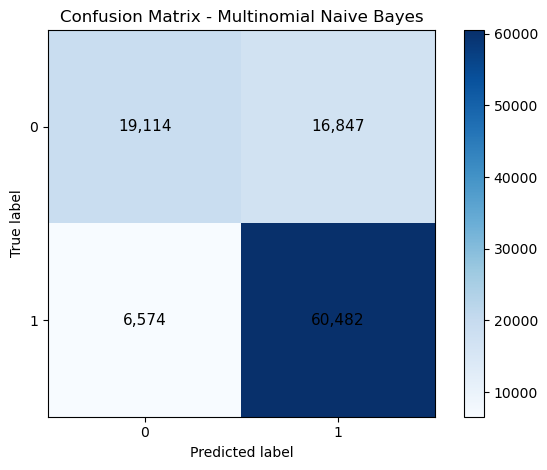

In [72]:
cm_nb = confusion_matrix(y_test, y_pred_nb)

fig, ax = plt.subplots()
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=["Negative", "Positive"])
disp_nb.plot(cmap="Blues", ax=ax, values_format=None) 

for txt in ax.texts:
    txt.set_visible(False)

for i in range(cm_nb.shape[0]):
    for j in range(cm_nb.shape[1]):
        ax.text(j, i, f"{cm_nb[i, j]:,}", ha="center", va="center", fontsize=11, color="black")

ax.xaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.set_major_formatter(ScalarFormatter())

plt.title("Confusion Matrix - Multinomial Naive Bayes")
plt.tight_layout()
plt.show()

The model correctly predicts most positive reviews (TP = 60,482), but misclassifies many negatives (FP = 16,847).  
This confirms the class imbalance issue seen earlier, with the model favoring the majority class (positive).

Compared to Logistic Regression, Naive Bayes shows lower recall for negative reviews and slightly more false positives.  
This is expected given its simplicity and the independence assumptions of the algorithm.

### 5.3 Support Vector Machine (SVM)

Support Vector Machines are effective for high-dimensional data like TF-IDF. We train a linear SVM to classify reviews as positive or negative.

##### Initialize the model

In [73]:
svm = LinearSVC(random_state=42)

##### Fit on TF-IDF training data

In [74]:
svm.fit(X_train_tfidf, y_train)

LinearSVC(random_state=42)

##### Predict on test set

In [75]:
y_pred_svm = svm.predict(X_test_tfidf)

#### SVM Evaluation

##### Accuracy score

In [76]:
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {svm_accuracy:.4f}")

SVM Accuracy: 0.7875


##### Classification report

In [77]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))


Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.62      0.67     35961
           1       0.81      0.88      0.84     67056

    accuracy                           0.79    103017
   macro avg       0.77      0.75      0.76    103017
weighted avg       0.78      0.79      0.78    103017



The model achieves **78.8% accuracy**, close to Logistic Regression (79.1%) and above Naive Bayes (77.3%).

- **Negative class (0)**: Precision = 0.73, Recall = 0.62  
- **Positive class (1)**: Precision = 0.81, Recall = 0.88

SVM performs well overall, especially on positive reviews.  
However, recall for negative reviews remains lower, showing that class imbalance still affects performance.

We now move on to a neural approach (LSTM) with class weighting to better handle this imbalance.

#### Confusion matrix - SVM

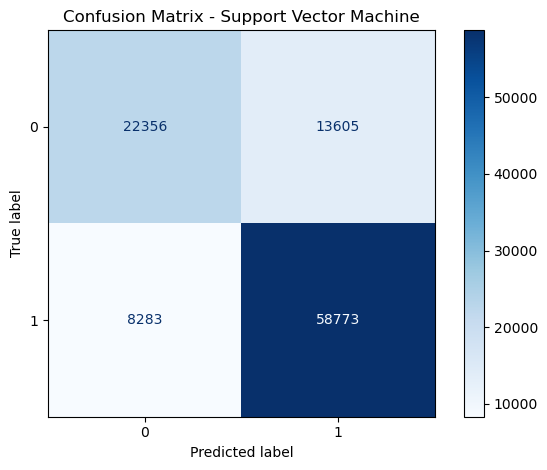

In [78]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=["Negative", "Positive"])
fig, ax = plt.subplots()
disp_svm.plot(cmap="Blues", ax=ax)
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.set_major_formatter(ScalarFormatter())
plt.title("Confusion Matrix - Support Vector Machine")
plt.tight_layout()
plt.show()

SVM correctly identifies most positive reviews (TP = 58,773) and a fair number of negatives (TN = 22,356).  
However, it still misclassifies 13,605 negative reviews as positive (false positives), reflecting the ongoing class imbalance.

Compared to Naive Bayes, SVM improves both precision and recall for the negative class, though Logistic Regression remains slightly better overall.

This reinforces the need for more advanced techniques to reduce false positives — which we address using LSTM with class weights.


### 5. 4 LSTM (Long Short-Term Memory) Model

LSTM (Long Short-Term Memory) networks are a type of Recurrent Neural Network (RNN) that are well-suited for sequence prediction problems such as sentiment analysis of text reviews. Unlike traditional models, LSTMs capture the sequential structure of text, which can lead to better understanding of context and sentiment.

##### Review length analysis for padding decision

In [79]:
review_lengths = X_train.apply(lambda x: len(x.split()))

long_reviews = (review_lengths > 100).sum()
total_reviews = len(review_lengths)
percentage = (long_reviews / total_reviews) * 100

print(f"Reviews longer than 100 words: {long_reviews} out of {total_reviews} ({percentage:.2f}%)")


Reviews longer than 100 words: 3038 out of 412068 (0.74%)


We chose max_len = 200 for padding based on the distribution of review lengths in the training set.
Only 141 out of 412,068 reviews (0.03%) exceeded this length, meaning that almost all reviews will be fully retained.
This makes 200 a safe and efficient threshold for capturing review content while keeping model complexity low.

##### Vocabulary size decision

We limit the vocabulary size to the 10,000 most frequent words in the training data. This helps reduce noise from rare words, speeds up training, and limits memory usage. Most sentiment-related information is usually captured within the top 5,000–20,000 words. A value of 10,000 provides a good trade-off between model complexity and performance.


##### Tokenize and Pad Texts

In [80]:
max_words = 10000
max_len = 200
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

##### Convert texts to sequences

In [81]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

##### Pad sequences to ensure equal input length

In [82]:
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

##### Early stopping

In [83]:
early_stop = EarlyStopping(
    monitor='val_loss', 
    patience=2, 
    restore_best_weights=True
)

Use early stopping to prevent overfitting. Training stops if val_loss does not improve for 2 consecutive epochs and restores the best weights

##### Define the LSTM Model

In [84]:
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128),
    Dropout(0.4),
    LSTM(64, return_sequences=True),
    Dropout(0.4),
    LSTM(32),
    Dense(16, activation='relu'),  
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.build(input_shape=(None, max_len)) 

#### Compute class weights

In [85]:
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))
print("Class weights:", class_weight_dict)

Class weights: {0: 1.4323334144391533, 1: 0.7681444171454349}


Calculate class weights to handle class imbalance. This ensures the model treats both classes fairly during training

##### Train the model

In [ ]:
epochs = 5
batch_size = 32

history = model.fit(
    X_train_pad, y_train,
    validation_data=(X_test_pad, y_test),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1,
    callbacks=[early_stop],
    class_weight=class_weight_dict
)


Epoch 1/5
12878/12878 ━━━━━━━━━━━━━━━━━━━━ 1343s 104ms/step - accuracy: 0.7521 - loss: 0.4962 - val_accuracy: 0.7872 - val_loss: 0.4380
Epoch 2/5
12878/12878 ━━━━━━━━━━━━━━━━━━━━ 1352s 105ms/step - accuracy: 0.7873 - loss: 0.4428 - val_accuracy: 0.7917 - val_loss: 0.4352
Epoch 3/5
12878/12878 ━━━━━━━━━━━━━━━━━━━━ 1368s 106ms/step - accuracy: 0.7941 - loss: 0.4291 - val_accuracy: 0.7905 - val_loss: 0.4362
Epoch 4/5
12878/12878 ━━━━━━━━━━━━━━━━━━━━ 1400s 109ms/step - accuracy: 0.8013 - loss: 0.4173 - val_accuracy: 0.7897 - val_loss: 0.4362


The model reaches its best validation accuracy at epoch 2 (val_accuracy = 0.7917), slightly better than earlier models.  
After this point, validation performance plateaus and begins to decline slightly, indicating early signs of overfitting.

Training was stopped after epoch 4 using early stopping to avoid unnecessary computation and overfitting.

#### Evaluation of the LSTM Model

After training the LSTM model, we evaluate its performance using predictions on the test set and generate a classification report to analyze metrics such as precision, recall, and F1-score.

In [87]:
# Predict labels on the test set
y_pred_prob = model.predict(X_test_pad)
y_pred = (y_pred_prob > 0.5).astype(int)

# Classification report
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, output_dict=False)
print("Classification Report:\n")
print(report)


3220/3220 ━━━━━━━━━━━━━━━━━━━━ 76s 23ms/step
Classification Report:

              precision    recall  f1-score   support

           0       0.68      0.75      0.72     35961
           1       0.86      0.81      0.84     67056

    accuracy                           0.79    103017
   macro avg       0.77      0.78      0.78    103017
weighted avg       0.80      0.79      0.79    103017



# Task II: Image classification using Convolutional Neural Networks

## 1. Introduction 

In the second task we gonna use Convolutional Neural Networks (CNN) on the 6000 pictures in the CIFAR-10 datasett. CNN is a class of deep learning models to classify different images. Data is collected from: (https://www.cs.toronto.edu/~kriz/cifar.html)

### Importing data

In [88]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
import pandas as pd

from tensorflow.keras import layers, models
from sklearn.utils import class_weight

from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

from sklearn.model_selection import train_test_split

from sklearn.utils import class_weight
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [89]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [90]:
image_shape = x_train.shape[1:]

print(f"Training set: {x_train.shape[0]} images of shape {image_shape}")
print(f"Test set: {x_test.shape[0]} images of shape {image_shape}")

Training set: 50000 images of shape (32, 32, 3)
Test set: 10000 images of shape (32, 32, 3)


## 2. Data Exploration and Class Distribution

### CIFAR-10 class names

In [91]:
class_labels = ['airplane','automobile','bird','cat','deer', 'dog','frog','horse','ship','truck']

In [92]:
# Flatten labels for easier handling
y_train_flat = y_train.flatten()
y_test_flat = y_test.flatten()

### Class Distribution in Training and Test Sets

In [93]:
labels, counts_train = np.unique(y_train_flat, return_counts=True)
_, counts_test = np.unique(y_test_flat, return_counts=True)

combined_summary = pd.DataFrame({
    "Class Label": labels,
    "Class": [class_labels[i] for i in labels],
    "Train Count": counts_train,
    "Test Count": counts_test
})

print(combined_summary)


   Class Label       Class  Train Count  Test Count
0            0    airplane         5000        1000
1            1  automobile         5000        1000
2            2        bird         5000        1000
3            3         cat         5000        1000
4            4        deer         5000        1000
5            5         dog         5000        1000
6            6        frog         5000        1000
7            7       horse         5000        1000
8            8        ship         5000        1000
9            9       truck         5000        1000


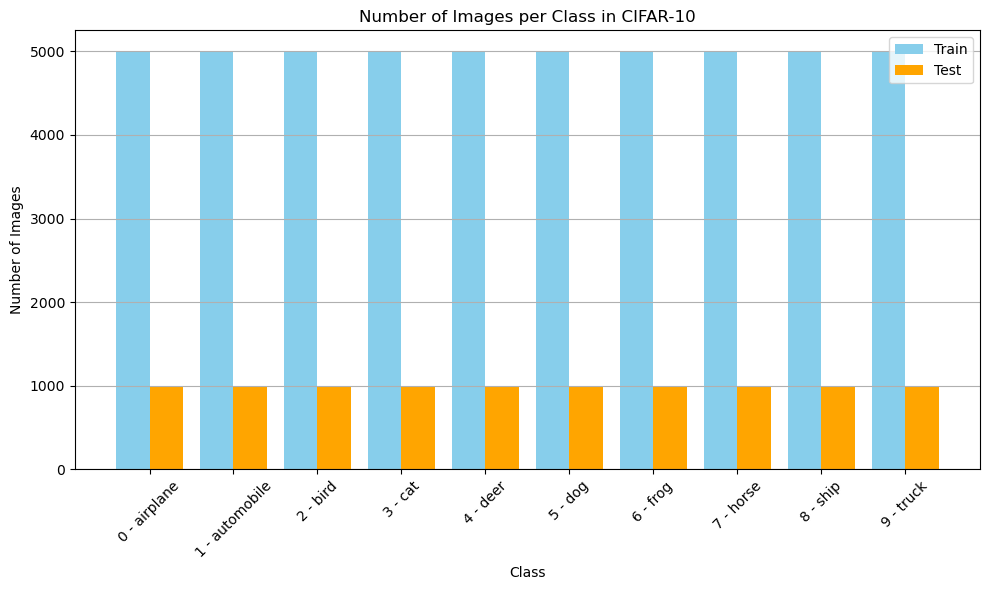

In [94]:
x = np.arange(len(class_labels))
width = 0.4

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, counts_train, width=width, label='Train', color='skyblue')
plt.bar(x + width/2, counts_test, width=width, label='Test', color='orange')

plt.title("Number of Images per Class in CIFAR-10")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.xticks(ticks=x, labels=[f"{i} - {name}" for i, name in enumerate(class_labels)], rotation=45)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()
plt.show()

The dataset is perfectly balanced: each of the 10 classes contains 5,000 training images and 1,000 test images. This even distribution ensures that the classifier will not be biased toward any particular class.

### Visualizing the first 20 images in the training set

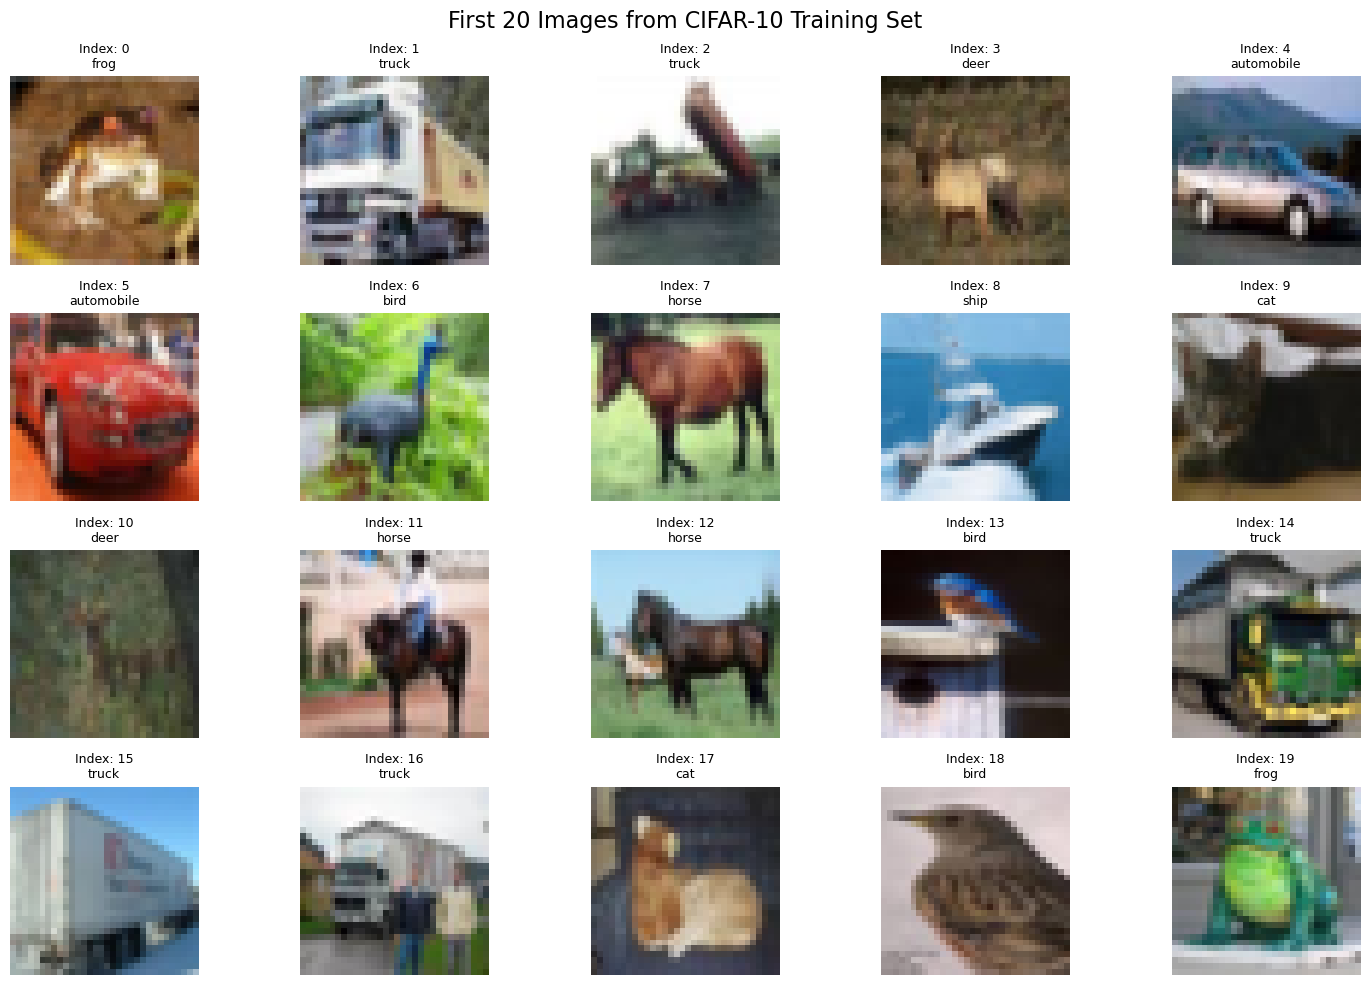

In [95]:
plt.figure(figsize=(15, 10))

for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(f"Index: {i}\n{class_labels[y_train[i][0]]}", fontsize=9)
    plt.axis('off')

plt.suptitle("First 20 Images from CIFAR-10 Training Set", fontsize=16)
plt.tight_layout()
plt.show()

We display a sample of the CIFAR-10 images to better understand the dataset and verify that the label categories are correct. This helps confirm that the dataset includes the 'cat' class, which we will use for binary classification.

## 3. Model ...


In [96]:
# Resize CIFAR-10 images from 32x32 to 75x75
x_train_resized = tf.image.resize(x_train, [75, 75])
x_test_resized = tf.image.resize(x_test, [75, 75])

In [97]:
# Normalize the images
x_train_resized = x_train_resized / 255.0
x_test_resized = x_test_resized / 255.0

In [98]:
# Define target class for binary classification
target_class = 3  # 3 = 'cat'

In [99]:
# Convert labels to binary: 1 if "cat" (label 3), else 0
y_train_binary = (y_train.flatten() == target_class).astype(np.int32)
y_test_binary = (y_test.flatten() == target_class).astype(np.int32)

In [100]:
# Split train into train and validation sets
x_train_resized = x_train_resized.numpy() if hasattr(x_train_resized, 'numpy') else x_train_resized

x_train_sub, x_val, y_train_sub, y_val = train_test_split(
    x_train_resized, y_train_binary, test_size=0.2, random_state=42, stratify=y_train_binary
)

In [101]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Input


# Load InceptionV3 without the top layer, set input shape to (75, 75, 3)
base_model = InceptionV3(include_top=False, weights='imagenet', input_tensor=Input(shape=(75, 75, 3)))
base_model.trainable = False  # Freeze the base model

In [102]:
# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
output = Dense(1, activation='sigmoid')(x)  # Binary classification

model = Model(inputs=base_model.input, outputs=output)

In [103]:
# Calculate class weights to handle imbalance
class_weights_array = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_sub),
    y=y_train_sub
)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights_array)}

print("Class weights:", class_weights_dict)

Class weights: {0: 0.5555555555555556, 1: 5.0}


In [104]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Add early stopping to avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [105]:
# Train the model
history = model.fit(
    x_train_sub, y_train_sub,
    validation_data=(x_val, y_val),
    epochs=10,
    batch_size=64,
    class_weight=class_weights_dict,
    callbacks=[early_stop]
)

Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_9']
Received: inputs=Tensor(shape=(64, 75, 75, 3))
  warnings.warn(msg)


625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.5568 - loss: 0.6888

/opt/anaconda3/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_9']
Received: inputs=Tensor(shape=(None, 75, 75, 3))
  warnings.warn(msg)


625/625 ━━━━━━━━━━━━━━━━━━━━ 92s 141ms/step - accuracy: 0.5569 - loss: 0.6888 - val_accuracy: 0.6691 - val_loss: 0.6255
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 135ms/step - accuracy: 0.7021 - loss: 0.5858 - val_accuracy: 0.7290 - val_loss: 0.5498
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 131ms/step - accuracy: 0.7410 - loss: 0.5408 - val_accuracy: 0.7455 - val_loss: 0.5232
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 129ms/step - accuracy: 0.7531 - loss: 0.5142 - val_accuracy: 0.7369 - val_loss: 0.5289
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 129ms/step - accuracy: 0.7561 - loss: 0.5038 - val_accuracy: 0.7327 - val_loss: 0.5346
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 127ms/step - accuracy: 0.7524 - loss: 0.4999 - val_accuracy: 0.7730 - val_loss: 0.4783
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 130ms/step - accuracy: 0.7675 - loss: 0.4807 - val_accuracy: 0.7641 - val_loss: 0.4880
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 125ms/step - accuracy: 0.7692 - loss: 0.4806 - val

In [110]:
import json

# 1. Les inn Jupyter-notebook-filen – endre navnet om nødvendig
with open("machine_learning_project.ipynb", "r", encoding="utf-8") as f:
    data = json.load(f)

# 2. Tell ord i markdown-celler
word_count = 0
for cell in data['cells']:
    if cell['cell_type'] == "markdown":
        for line in cell['source']:
            temp = [word for word in line.split() if "#" not in word]
            word_count += len(temp)

print(f"Total markdown word count: {word_count}")


Total markdown word count: 2856
